# 19MIA1066
# MADASU DEEPIKA

<font color=red><h1><center> LAB-5</center></h1></font>
<font color=red><h1><center> DEEP LEARNING </center></h1></font>
<font color=red><h1><center> CSE4037 </center></h1></font>

## Advance CNN Architectures: LeNet, AlexNet

## DATASET: https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

In [1]:
#Import required libraries 
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from PIL import Image

In [2]:
#Data loading and exploration
fpath = "images/Images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound'] 

No. of categories =  20


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3633, 227, 227, 3) 
Labels shape =  (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


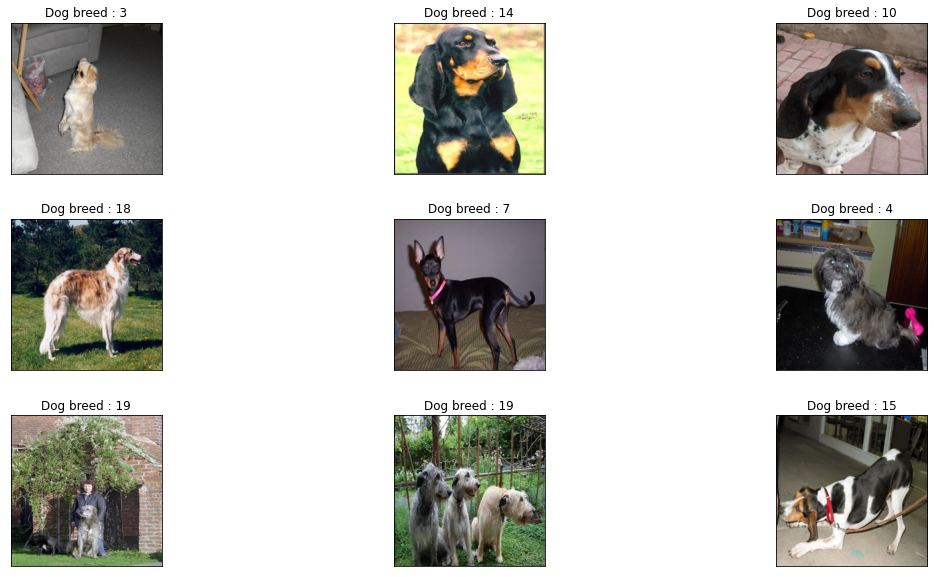

In [5]:
#Check few random images and labels by displaying them in a graph
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

Prepare data for training the CNN model

In [6]:
#For training the CNN model we have to shuffle all the data that is loaded in images, labels list.
#1-step in data shuffling
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3630 3631 3632]

'n' values after shuffling =  [2178  183  184 ...  860 3507 3174]


In [7]:
#2-step in data shuffling
#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]
print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [8]:
#Data normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3633, 227, 227, 3)


In [9]:
#Split the loaded dataset into train, test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2906, 227, 227, 3)
y_train shape =  (2906,)

x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


### AlexNet CNN model

In [10]:
model=Sequential()
#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
model.add(BatchNormalization())
#2 dense layer
model.add(Dense(4096,activation="relu"))
model.add(BatchNormalization())
#3 dense layer
model.add(Dense(1000,activation="relu"))
model.add(BatchNormalization())
#output layer
model.add(Dense(20,activation="softmax"))

In [11]:
#Compile the CNN model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Epochs=5

In [12]:
#Fit the model using training data
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
91/91 [==============================] - 122s 1s/step - loss: 3.3394 - accuracy: 0.1149
Epoch 2/5
91/91 [==============================] - 104s 1s/step - loss: 2.8705 - accuracy: 0.1549
Epoch 3/5
91/91 [==============================] - 98s 1s/step - loss: 2.7422 - accuracy: 0.1807
Epoch 4/5
91/91 [==============================] - 97s 1s/step - loss: 2.6950 - accuracy: 0.1869
Epoch 5/5
91/91 [==============================] - 105s 1s/step - loss: 2.6709 - accuracy: 0.1948


In [13]:
#Metrics to evaluate accuracy and loss in test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(loss,accuracy)

23/23 [==============================] - 7s 262ms/step - loss: 3.0474 - accuracy: 0.1568
3.0474226474761963 0.15680880844593048


### Epochs=10

In [16]:
#Fit the model using training data
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
91/91 [==============================] - 100s 1s/step - loss: 2.5926 - accuracy: 0.2261
Epoch 2/10
91/91 [==============================] - 114s 1s/step - loss: 2.5496 - accuracy: 0.2275
Epoch 3/10
91/91 [==============================] - 103s 1s/step - loss: 2.4940 - accuracy: 0.2440
Epoch 4/10
91/91 [==============================] - 95s 1s/step - loss: 2.4019 - accuracy: 0.2546
Epoch 5/10
91/91 [==============================] - 98s 1s/step - loss: 2.3332 - accuracy: 0.2856
Epoch 6/10
91/91 [==============================] - 97s 1s/step - loss: 2.3212 - accuracy: 0.2863
Epoch 7/10
91/91 [==============================] - 97s 1s/step - loss: 2.2037 - accuracy: 0.3138
Epoch 8/10
91/91 [==============================] - 98s 1s/step - loss: 2.0757 - accuracy: 0.3510
Epoch 9/10
91/91 [==============================] - 98s 1s/step - loss: 2.0331 - accuracy: 0.3747
Epoch 10/10
91/91 [==============================] - 105s 1s/step - loss: 1.9356 - accuracy: 0.3981


In [17]:
#Metrics to evaluate accuracy and loss in test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(loss,accuracy)

23/23 [==============================] - 6s 266ms/step - loss: 3.4997 - accuracy: 0.1486
3.4996531009674072 0.1485557109117508


### Adding Dropout=0.4

In [18]:
model=Sequential()
#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#2 dense layer
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#3 dense layer
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#output layer
model.add(Dense(20,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                      

In [19]:
#Compile the CNN model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
#Fit the model using training data
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
91/91 [==============================] - 107s 1s/step - loss: 3.4682 - accuracy: 0.0977
Epoch 2/5
91/91 [==============================] - 108s 1s/step - loss: 3.1601 - accuracy: 0.1263
Epoch 3/5
91/91 [==============================] - 104s 1s/step - loss: 3.0121 - accuracy: 0.1514
Epoch 4/5
91/91 [==============================] - 120s 1s/step - loss: 2.9096 - accuracy: 0.1535
Epoch 5/5
91/91 [==============================] - 112s 1s/step - loss: 2.8201 - accuracy: 0.1776


In [24]:
#Metrics to evaluate accuracy and loss in test dataset
loss1, accuracy1 = model.evaluate(x_test, y_test)
print(loss1,accuracy1)

23/23 [==============================] - 5s 203ms/step - loss: 2.9608 - accuracy: 0.1609
2.9608495235443115 0.16093535721302032


In [26]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### LeNet CNN Model

In [29]:
# LeNET model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(20, activation='softmax'))

model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 48)      38448     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 48)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 139968)            0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [30]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [31]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train)

# set train Generator
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
datagen.fit(x_train

In [32]:
history=model.fit(x_train, y_train, batch_size=32, steps_per_epoch=len(x_train)/100, 
                    epochs=30, validation_data=(x_val, y_val), callbacks=[reduce_lr])

Epoch 1/30
29/29 [==============================] - 71s 2s/step - loss: 178.6015 - accuracy: 0.0490 - val_loss: 2.9989 - val_accuracy: 0.0633 - lr: 5.0000e-04
Epoch 2/30
29/29 [==============================] - 81s 3s/step - loss: 2.9959 - accuracy: 0.0500 - val_loss: 2.9979 - val_accuracy: 0.0605 - lr: 5.0000e-04
Epoch 3/30
29/29 [==============================] - 88s 3s/step - loss: 2.9999 - accuracy: 0.0604 - val_loss: 2.9972 - val_accuracy: 0.0619 - lr: 5.0000e-04
Epoch 4/30
29/29 [==============================] - 73s 3s/step - loss: 2.9250 - accuracy: 0.1415 - val_loss: 3.0482 - val_accuracy: 0.0440 - lr: 5.0000e-04
Epoch 5/30
29/29 [==============================] - 68s 2s/step - loss: 2.9207 - accuracy: 0.1240 - val_loss: 3.0283 - val_accuracy: 0.0495 - lr: 5.0000e-04
Epoch 6/30
29/29 [==============================] - 68s 2s/step - loss: 2.9212 - accuracy: 0.1250 - val_loss: 3.0168 - val_accuracy: 0.0536 - lr: 5.0000e-04
Epoch 7/30
29/29 [==============================] - 65s 

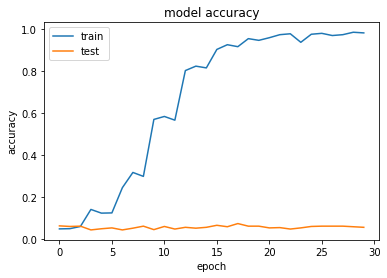

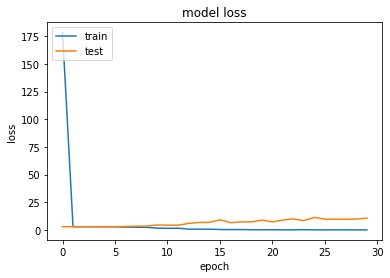

In [33]:
# plot model performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.figure()
plt.gcf().clear()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [34]:
print('Final training loss \t', history.history['loss'][-1]*100)
print('Final training accuracy ', history.history['accuracy'][-1]*100)

Final training loss 	 8.947017788887024
Final training accuracy  98.22916388511658


## Using Early Stopping

In [35]:
# callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history=model.fit(x_train, y_train, batch_size=32, steps_per_epoch=len(x_train)/100, 
                    epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping_callback])

Epoch 1/30
29/29 [==============================] - 64s 2s/step - loss: 0.0652 - accuracy: 0.9917 - val_loss: 8.5777 - val_accuracy: 0.0660
Epoch 2/30
29/29 [==============================] - 68s 2s/step - loss: 0.0799 - accuracy: 0.9865 - val_loss: 11.1668 - val_accuracy: 0.0591
Epoch 3/30
29/29 [==============================] - 66s 2s/step - loss: 0.0681 - accuracy: 0.9865 - val_loss: 11.7097 - val_accuracy: 0.0550
Epoch 4/30
29/29 [==============================] - 68s 2s/step - loss: 0.0444 - accuracy: 0.9937 - val_loss: 10.6747 - val_accuracy: 0.0605


In [36]:
print('Final training loss \t', history.history['loss'][-1]*100)
print('Final training accuracy ', history.history['accuracy'][-1]*100)

Final training loss 	 4.4443778693675995
Final training accuracy  99.37106966972351


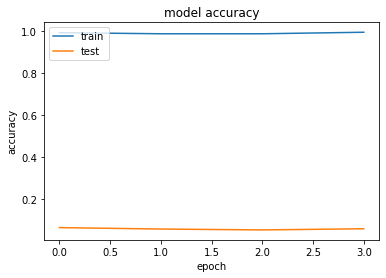

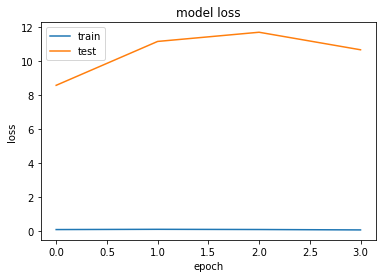

In [37]:
# plot model performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.figure()
plt.gcf().clear()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()